In [63]:
import pandas as pd

In [64]:
df = pd.read_csv('Churn_Modelling.csv')

In [65]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [66]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [67]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [68]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df.Geography_Germany = df.Geography_Germany.replace({True: 1, False: 0})
df.Geography_Spain = df.Geography_Spain.replace({True: 1, False: 0})
df.Gender_Male = df.Gender_Male.replace({True: 1, False: 0})
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [69]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [70]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [72]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [73]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [74]:
model.summary()
X_train

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 11)                132       
                                                                 
 dense_10 (Dense)            (None, 11)                132       
                                                                 
 dense_11 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7681,641,33,2,146193.60,2,1,1,55796.83,0,0,1
9031,541,39,7,0.00,2,1,0,19823.02,0,0,1
3691,590,76,5,160979.68,1,0,1,13848.58,0,0,0
202,516,50,5,0.00,1,0,1,146145.93,0,1,1
5625,508,60,7,143262.04,1,1,1,129562.74,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,1,0,0
4859,794,22,4,114440.24,1,1,1,107753.07,0,1,0
3264,738,35,5,161274.05,2,1,0,181429.87,0,0,1
9845,590,38,9,0.00,2,1,1,148750.16,0,1,0


In [75]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  int64  
 10  Geography_Spain    10000 non-null  int64  
 11  Gender_Male        10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


In [76]:
history = model.fit(X_train,y_train,batch_size=50,epochs=200,verbose=1,validation_split=0.2)

Epoch 1/200
112/112 [==============================] - 0s 1ms/step - loss: 0.6445 - accuracy: 0.6243 - val_loss: 0.5406 - val_accuracy: 0.8000
Epoch 2/200
112/112 [==============================] - 0s 468us/step - loss: 0.5165 - accuracy: 0.7971 - val_loss: 0.4987 - val_accuracy: 0.8000
Epoch 3/200
112/112 [==============================] - 0s 466us/step - loss: 0.5016 - accuracy: 0.7971 - val_loss: 0.4953 - val_accuracy: 0.8000
Epoch 4/200
112/112 [==============================] - 0s 480us/step - loss: 0.5004 - accuracy: 0.7971 - val_loss: 0.4945 - val_accuracy: 0.8000
Epoch 5/200
112/112 [==============================] - 0s 462us/step - loss: 0.5000 - accuracy: 0.7971 - val_loss: 0.4941 - val_accuracy: 0.8000
Epoch 6/200
112/112 [==============================] - 0s 2ms/step - loss: 0.4996 - accuracy: 0.7971 - val_loss: 0.4937 - val_accuracy: 0.8000
Epoch 7/200
112/112 [==============================] - 0s 451us/step - loss: 0.4992 - accuracy: 0.7971 - val_loss: 0.4937 - val_accura

In [77]:
y_pred = model.predict(X_test)

94/94 [==============================] - 0s 221us/step


In [78]:
y_pred

array([[0.26697382],
       [0.24143668],
       [0.25788406],
       ...,
       [0.25788406],
       [0.23892148],
       [0.23892148]], dtype=float32)

In [79]:
y_pred = y_pred.argmax(axis=-1)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.793

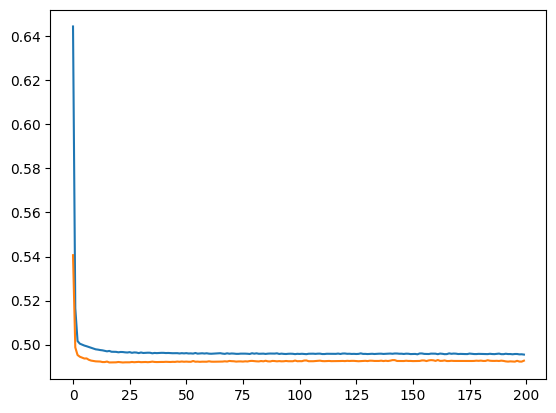

In [81]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

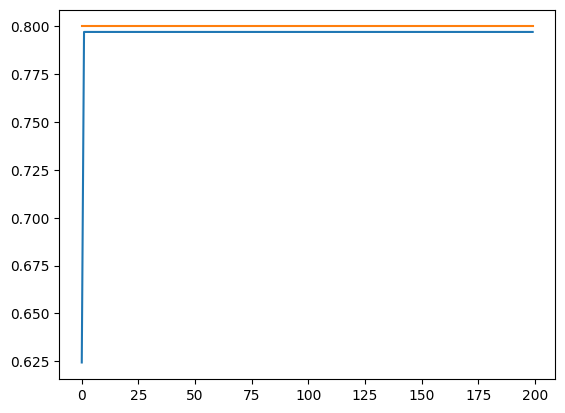

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])